<b>Creating CNN Using Scratch And Transfer Learning</b>

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Train'
valid_path = r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Test'

In [3]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Train\*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 2) dtype=float32>

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
13/13 [==============================] - 138s 11s/step - loss: 1.3760 - accuracy: 0.5072 - val_loss: 0.9560 - val_accuracy: 0.5072
Epoch 2/5
13/13 [==============================] - 135s 10s/step - loss: 0.6587 - accuracy: 0.6587 - val_loss: 0.4864 - val_accuracy: 0.7644
Epoch 3/5
13/13 [==============================] - 138s 11s/step - loss: 0.5214 - accuracy: 0.7236 - val_loss: 0.4082 - val_accuracy: 0.7885
Epoch 4/5
13/13 [==============================] - 135s 10s/step - loss: 0.3279 - accuracy: 0.8726 - val_loss: 0.3061 - val_accuracy: 0.8846
Epoch 5/5
13/13 [==============================] - 141s 11s/step - loss: 0.3384 - accuracy: 0.8582 - val_loss: 0.2956 - val_accuracy: 0.8822


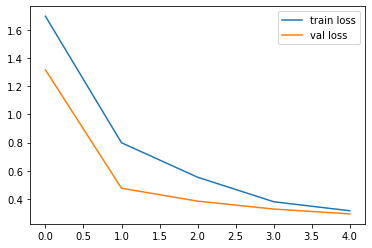

<Figure size 432x288 with 0 Axes>

In [27]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


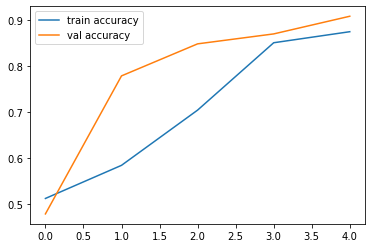

<Figure size 432x288 with 0 Axes>

In [28]:

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [29]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

UnInfected


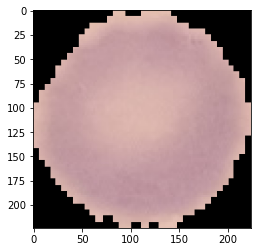

In [55]:
from keras.preprocessing import image
img = image.load_img(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\cell_images\Test\Uninfected\C3thin_original_IMG_20150608_163029_cell_202.png",target_size=(224,224))
img =img_to_array(img)
img=img/255.0
plt.imshow(img)
img = np.expand_dims(img, axis=0)
'''from keras.models import load_model
saved_model = load_model("model_vgg19.h5")'''
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("Infected")
else:
    print('UnInfected')

In [56]:
output[0][0],output[0][1]

(0.4343817, 0.5656184)